<a href="https://colab.research.google.com/github/DeaAnalytics/univ-workshop/blob/main/notebooks/R/Sesion4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#leer el archivo .csv y renombrarlo como data
RL1 <-read.csv("https://github.com/DeaAnalytics/univ-workshop/raw/main/data/RegresionLineal_train.csv")
RL1

peso,long
<int>,<int>
46,30
55,35
52,33
56,35
50,36
52,36
55,36
47,31
53,38


In [8]:
#Descargamos el paquete que usaremos: ggplot
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



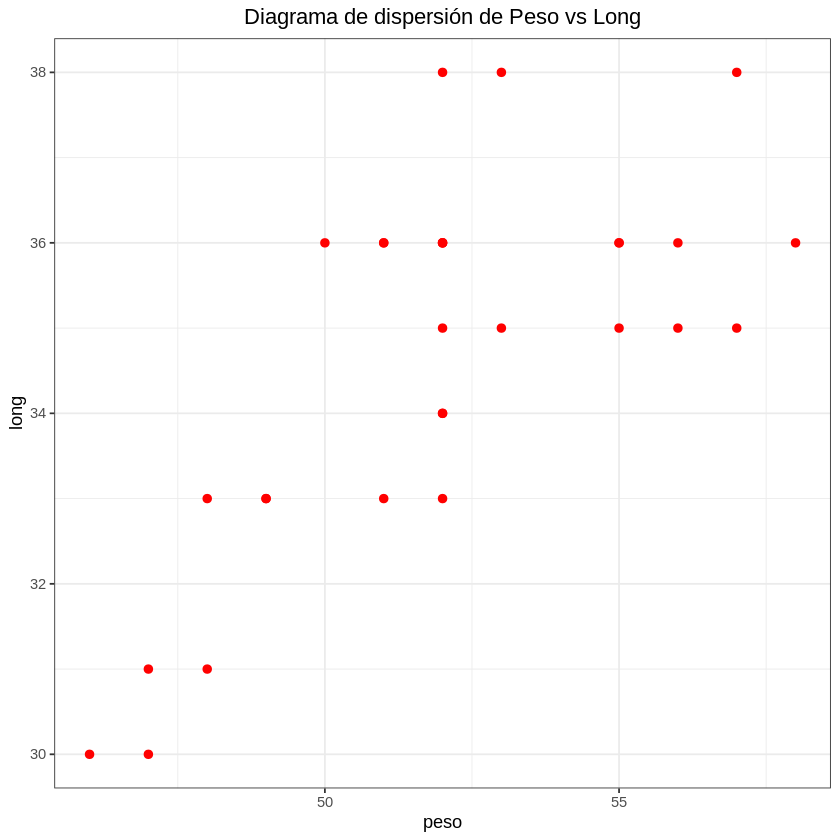

In [ ]:
#Gráfico de dispersión utilizando la librería ggplot2 y la función ggplot donde mi data=RL1 (nombre que le dí a mi tabla), defino quien es x e y
#con la funcionalidad geom_point le doy color y tamaño a mis puntos en el gráfico de dispersión
#con labs le doy título y nombre al eje x
library(ggplot2)
ggplot(data = RL1, mapping = aes(x = peso, y = long)) + 
  geom_point(color = "red", size = 2) +
  labs(title = "Diagrama de dispersión de Peso vs Long", x = 'peso') + 
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5))

`geom_smooth()` using formula 'y ~ x'



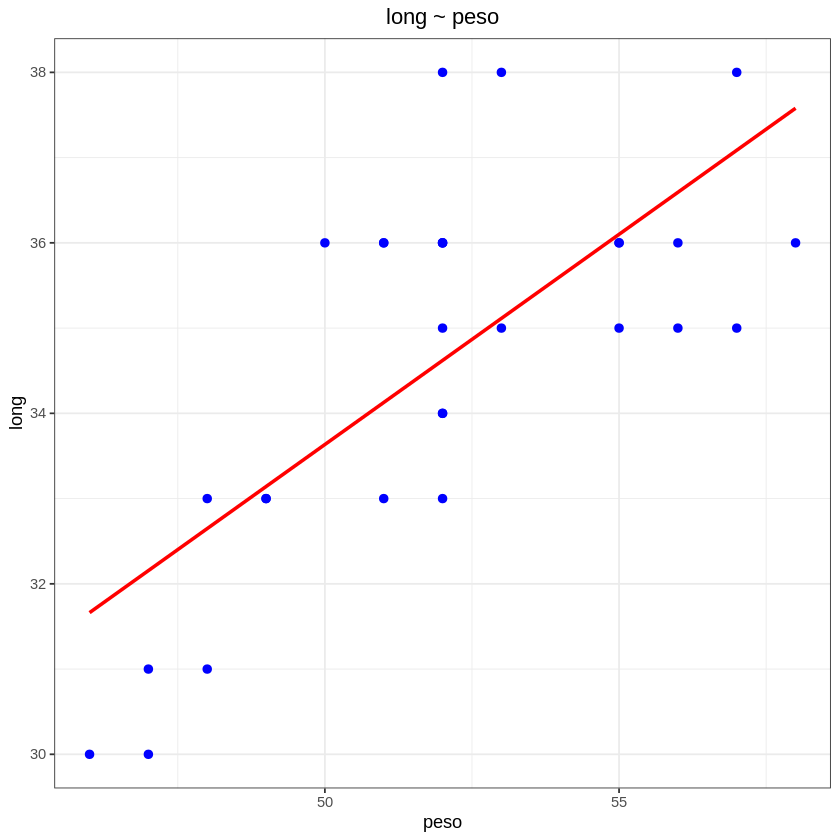

In [ ]:
#Gráfico de dispersión con recta estimada: es practicamente lo mismo, solo le cambio a color azul los puntos, el título 
#utilizo geom_smooth para utilizar el método lm para trazar la recta estimada y le doy color rojo
ggplot(data = RL1, mapping = aes(x = peso, y = long)) +
  geom_point(color = "blue", size = 2) +
  labs(title = 'long ~ peso', x = 'peso') +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5))

In [ ]:
#Coeficiente de Correlación (Método de Pearson), Modelo de regresión lineal (con la función lm para relacionar long con peso) y el summary de lm 
cor.test(x = RL1$peso, y = RL1$long, method = "pearson")
modelo_lineal <- lm(long ~ peso, RL1)
summary(modelo_lineal)


	Pearson's product-moment correlation

data:  RL1$peso and RL1$long
t = 5.3582, df = 27, p-value = 1.165e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4768279 0.8585050
sample estimates:
      cor 
0.7178773 



Call:
lm(formula = long ~ peso, data = RL1)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1552 -1.1552 -0.1414  1.3793  3.3793 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.97931    4.79431   1.873   0.0719 .  
peso         0.49310    0.09203   5.358 1.17e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.567 on 27 degrees of freedom
Multiple R-squared:  0.5153,	Adjusted R-squared:  0.4974 
F-statistic: 28.71 on 1 and 27 DF,  p-value: 1.165e-05


In [ ]:
#A partir del ANOVA anterior, podemos empezar a construir nuestra predicción de la variable long dependiendo del peso del producto
#CONSTRUCCIÓN DE LA PREDICCIÓN DE LONG: long_estimado=8.97931+0.49310*peso (lo obtenemos a continuación), 
#OJO: pero aún falta hacer varias VALIDACIONES

In [ ]:
#Anova para validar que si Valor crítico de F<0.05 (que aparece como Pr(>F)) se rechaza H0, entonces x~y. En este caso es 1.16x10-05
anova(modelo_lineal)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
peso,1,70.51379,70.513793,28.71005,1.165042e-05
Residuals,27,66.31379,2.456066,NA,NA


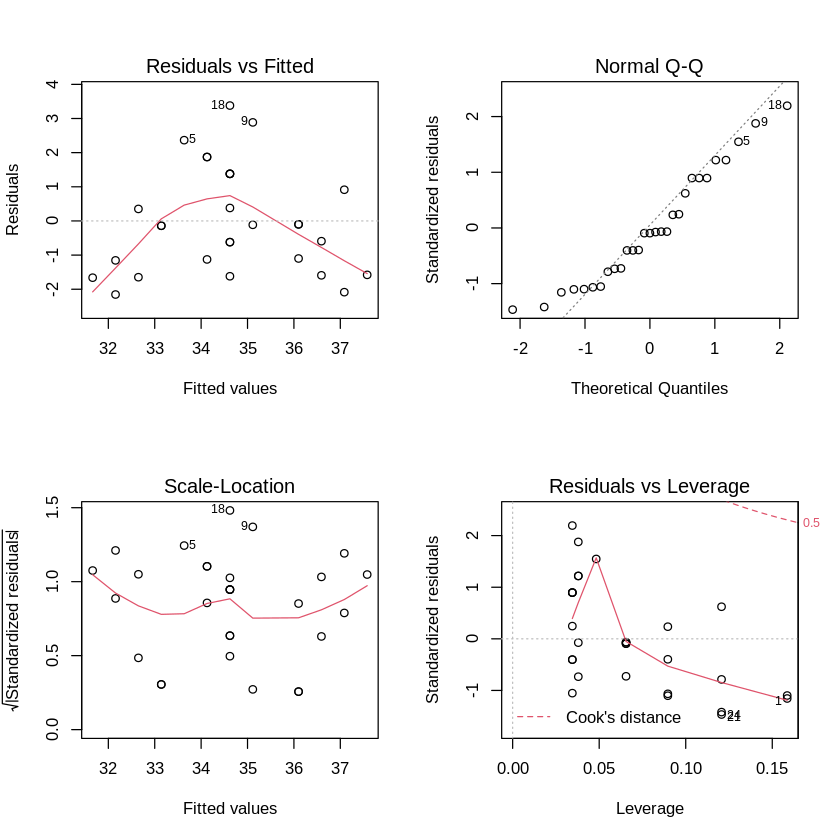

In [ ]:
#Hacemos la validación de Supuestos: Gráficos de residuales
par(mfrow = c(2,2))
plot(modelo_lineal)
par(mfrow = c(1,1))

In [3]:
#Ahora tomemos una tabla con datos "desconocidos por el modelo" (SIEMPRE diferente con la que entrenamos a nuestro modelo para hacer el testeo) 
RL_test <-read.csv("https://github.com/DeaAnalytics/univ-workshop/raw/main/data/RegresionLineal_Test.csv")
RL_test

peso,long
<int>,<int>
50,33
58,37
49,32
54,36
53,34
57,35
48,31
52,35
51,34


In [4]:
#Ordenamos en base a la variable peso, para obtener más adelante una gráfica visualmente "limpia"
Ord <- RL_test[order(RL_test$peso),]
Ord

,peso,long
,<int>,<int>
14,47,32
7,48,31
3,49,32
1,50,33
9,51,34
8,52,35
5,53,34
4,54,36
11,55,36


In [5]:
#Defino quien es mi variable x: independiente
x <- Ord$peso

In [6]:
#Defino quien es mi variable y: dependiente (dicho de otra manera la variable que depende del valor que tome el peso, es la longitud=y)
yreal <- Ord$long

In [7]:
#Para fines de graficar, obtengo los valores estimados (predichos) por mi ecuación construida en el ANOVA
#yPred=LongitudEstimada = 8.97931+0.49310*x = 8.97931+0.49310*peso
yPred = 8.97931+0.49310*x
yPred

[1] 32.15501 32.64811 33.14121 33.63431 34.12741 34.62051 35.11361 35.60671
 [9] 36.09981 36.59291 37.08601 37.57911 38.07221 38.56531

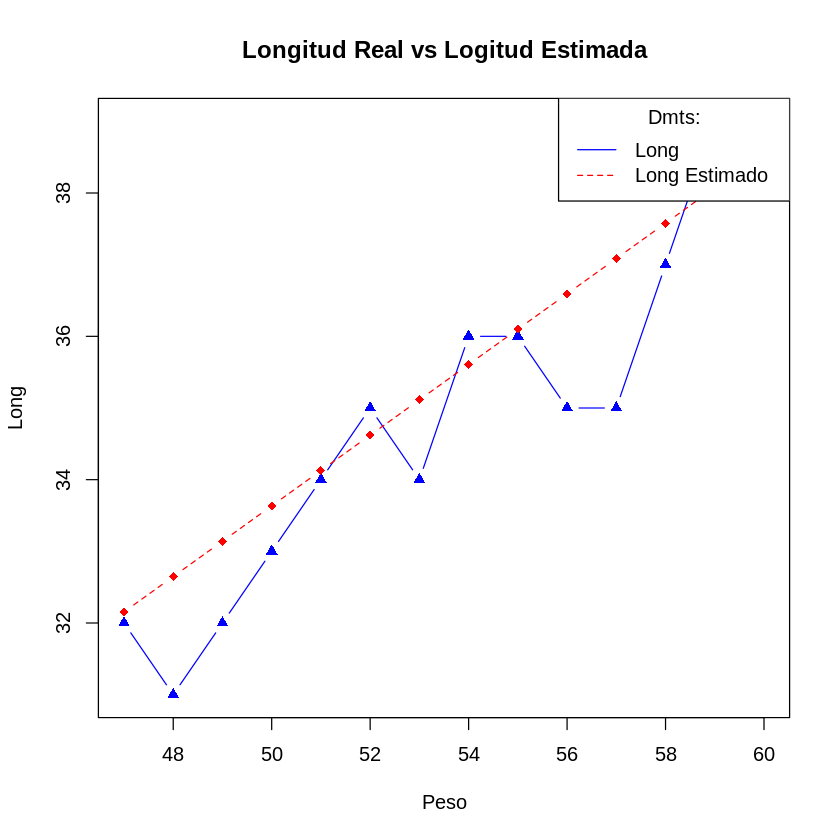

In [11]:
#Ahora primero grafico a través de "plot" la primer gráfica donde x=peso, y=longitud real, 
#añado algunos estilos que hemos visto en otras sesiones como color, nombres a ejes, título y el pch que nos sirve para poner puntos en formas geométricas
#Luego añado la segunda gráfica con "lines", donde x=peso, y=longitud estimada (Predicción) y agrego otro tipo y lty para que lo ponga punteado
#Agrego una leyenda para identificar cual es la gráfica de datos reales vs datos estimados (long real vs long estimada)
#Añado título, el nombre de cada gráfico (long y longestimado), le pongo color para diferenciarla y lty lo uso para que uno sea linea y otro punteado
plot(x, yreal, type="b", pch=17, col = "blue", xlab = "Peso", ylab = "Long", main = "Longitud Real vs Logitud Estimada")
lines(x, yPred, pch = 18, col = "red", type = "b", lty = 2)
legend("topright", title = "Dmts:" ,legend=c("Long", "Long Estimado"), col=c("blue","red"),
       lty=c(1,2))